In [1]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


## Kunal Patle

### Task 1 Predicting Using Supervised ML

Objective :- Predict the percentage of a student based on the no. of study hours, and predict the score of a student if he studies for 9.25 hrs/day.

#### Data

* Data can be fund here - http://bit.ly/w-data
* Data is stored in Tabular form and have only 2 columns and 25 records. 

## Importing the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Reading the Required Dataset

In [3]:
data=pd.read_csv("http://bit.ly/w-data")
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

Our Dataset contains 2 columns and 25 records of students.

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Form above table we know that there are no null values present in our dataset.

# Plotting the Distribution of Scores

<Figure size 720x720 with 0 Axes>

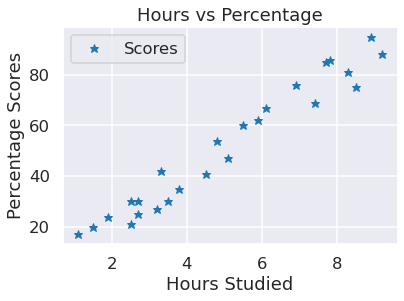

In [6]:
plt.figure(figsize=(10,10))
sns.set_style('darkgrid')
sns.set_context('talk')
data.plot(x='Hours',y='Scores',style='*')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()

From the above graph we can say that there is a positive linear relation between the number of hours studied and percentage of student.

In [7]:
cor=data.corr()
cor

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


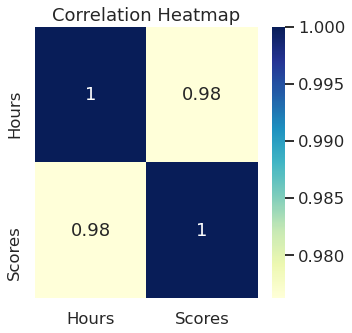

In [8]:
fig,ax=plt.subplots(figsize=(5,5))
plt.title('Correlation Heatmap')
sns.heatmap(cor,annot=True,cmap='YlGnBu');

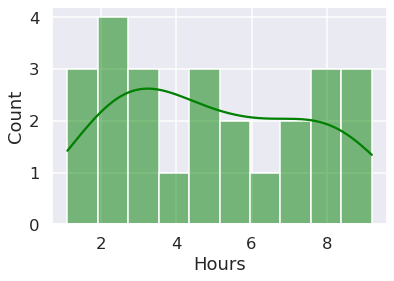

In [9]:
sns.histplot(data['Hours'],bins=10,kde=True,color='g');

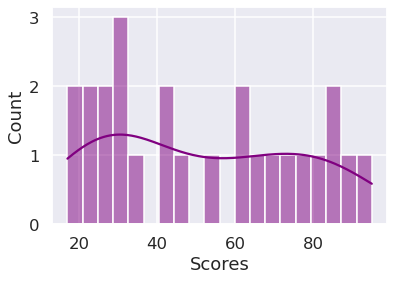

In [10]:
sns.histplot(data['Scores'],bins=20,kde=True,color='purple');

# Data Preparation

In [11]:
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

Splitting up the data in Train and Test data sets.

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

## Trainig the Algorithm

We have split our dataset into train and test data sets, noow it's time to train our algorithm.

In [13]:
from sklearn.linear_model import LinearRegression
lnreg= LinearRegression()
lnreg.fit(x_train,y_train)

LinearRegression()

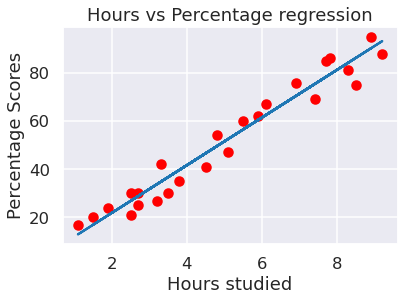

In [14]:
# Plotting the regression line 
line=lnreg.coef_*x+lnreg.intercept_

# Plotting for the test data
plt.scatter(x,y,color='r')
plt.title('Hours vs Percentage regression')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Scores')
plt.plot(x,line)
plt.show()

## Making Predictions

Now, after the training of our algorithm, we will make some prediction

In [15]:
print(x_test)
y_pred=lnreg.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Comparing Actual and Predicted 
df= pd.DataFrame({'Actual':y_test,'Predicted':y_pred,})
df['Error']=df['Actual']-df['Predicted']
df

,Actual,Predicted,Error
0,20,16.884145,3.115855
1,27,33.732261,-6.732261
2,69,75.357018,-6.357018
3,30,26.794801,3.205199
4,62,60.491033,1.508967


Now we will predict the score of a student who studies 9.25 hrs/day.

In [17]:
# Predicting own data
hours = 9.25
own_pred=lnreg.predict([[hours]])
print("No. of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.69173248737539


# Evaluating the Model

In [18]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982


In [19]:
print('R2 Score :',metrics.r2_score(y_test,y_pred))

R2 Score : 0.9454906892105354
